In [1]:
%matplotlib inline

# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
city_df = pd.DataFrame(city_data)
city_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df = pd.DataFrame(ride_data)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
merge_table = pd.merge(ride_df, city_df, on="city")


In [5]:
# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

#df of each city type type

urban_df = merge_table.loc[(merge_table["type"] == "Urban")]
suburban_df = merge_table.loc[(merge_table["type"] == "Suburban")]
rural_df = merge_table.loc[(merge_table["type"] == "Rural")]

#average fare per city

urbancity_avgfare = urban_df.groupby(["city"])["fare"].mean()
suburbancity_avgfare = suburban_df.groupby(["city"])["fare"].mean()
ruralcity_avgfare = rural_df.groupby(["city"])["fare"].mean()


#total rides per city

urbancity_totalrides = urban_df.groupby(["city"]).count()["ride_id"]
suburbancity_totalrides = suburban_df.groupby(["city"]).count()["ride_id"]
ruralcity_totalrides = rural_df.groupby(["city"]).count()["ride_id"]

#driver count per city

urbancity_drivers = urban_df.groupby(["city"])["driver_count"].mean()
suburbancity_drivers = suburban_df.groupby(["city"])["driver_count"].mean()
ruralcity_drivers = rural_df.groupby(["city"])["driver_count"].mean()


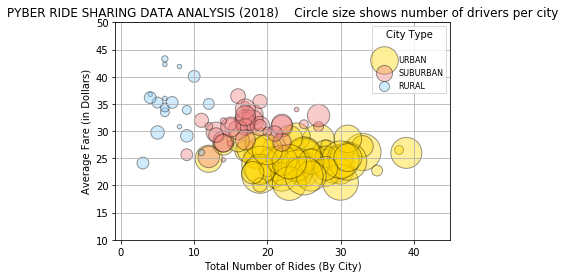

In [7]:
# Build the scatter plots for each city types

plt.xlim(-0.75,45)
plt.ylim(10,50)   

    
#urban plot
plt.scatter(urbancity_totalrides, urbancity_avgfare, s=urbancity_drivers*20, alpha=0.4, marker="o", facecolors="gold", edgecolors="black", label = "URBAN")

# #suburban plot
plt.scatter(suburbancity_totalrides, suburbancity_avgfare, s=suburbancity_drivers*20, alpha=0.4, marker="o", facecolors="lightcoral", edgecolors="black", label = "SUBURBAN")


# #rural plot
plt.scatter(ruralcity_totalrides, ruralcity_avgfare, s=ruralcity_drivers*20, alpha=0.4, marker="o", facecolors="lightskyblue", edgecolors="black", label = "RURAL")


plt.title("PYBER RIDE SHARING DATA ANALYSIS (2018)    Circle size shows number of drivers per city")
plt.xlabel("Total Number of Rides (By City)")
plt.ylabel("Average Fare (in Dollars)")

# Create a legend
plt.legend(loc="best", fontsize=8, title="City Type\n")
plt.grid(True)




plt.savefig("../pyberscatter_abraham_20180627.png")

# Show plot
plt.show()


## Total Fares by City Type

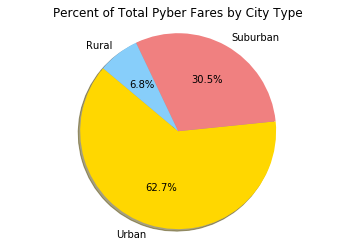

In [8]:
# Calculate Type Percents
urbancity_totfare = urban_df["fare"].sum()
suburbancity_totfare = suburban_df["fare"].sum()
ruralcity_totfare = rural_df["fare"].sum()

plt.title("Percent of Total Pyber Fares by City Type")
citytype = ["Urban", "Suburban", "Rural"]
cityfares = [urbancity_totfare, suburbancity_totfare, ruralcity_totfare]
colors = ["gold", "lightcoral", "lightskyblue"]

# Build Pie Chart
plt.pie(cityfares, labels=citytype, colors=colors, autopct="%1.01f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../pybertotalfarebycity_abraham_20180627.png")

# Show Figure
plt.show()

## Total Rides by City Type

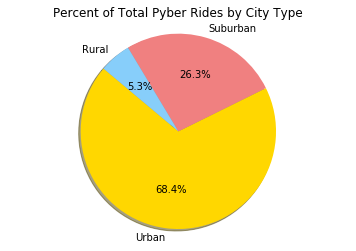

In [9]:
# Calculate Ride Percents

urbancity_totalrides = urban_df.count()["ride_id"]
suburbancity_totalrides = suburban_df.count()["ride_id"]
ruralcity_totalrides = rural_df.count()["ride_id"]

plt.title("Percent of Total Pyber Rides by City Type")
citytype = ["Urban", "Suburban", "Rural"]
cityrides = [urbancity_totalrides, suburbancity_totalrides, ruralcity_totalrides]
colors = ["gold", "lightcoral", "lightskyblue"]

# Build Pie Chart
plt.pie(cityrides, labels=citytype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../pybertotalridesbycity_abraham_20180627.png")

# Show Figure
plt.show()

## Total Drivers by City Type

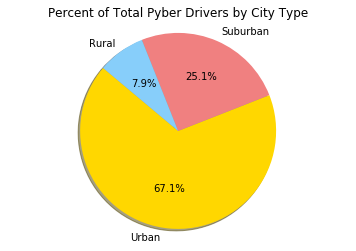

In [10]:
# Calculate Driver Percents
urbancity_drivers = urban_df["driver_count"].mean()
suburbancity_drivers = suburban_df["driver_count"].mean()
ruralcity_drivers = rural_df["driver_count"].mean()

plt.title("Percent of Total Pyber Drivers by City Type")
citytype = ["Urban", "Suburban", "Rural"]
citydrivers = [urbancity_drivers, suburbancity_drivers, ruralcity_drivers]
colors = ["gold", "lightcoral", "lightskyblue"]

# Build Pie Chart
plt.pie(citydrivers, labels=citytype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../pybertotaldriversbycity_abraham_20180627.png")

# Show Figure
plt.show()

In [11]:
# * You must include a written description of three observable trends based on the data.

# 1. The bulk of Pyber's business comes from the urban market
# 2. There are fewer rural rides taken but they are higher in value, presumably from traveling further distances.
# 3. Though fares are inversely related to population density, there are many more drivers serving the urban market. 